In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")

%matplotlib inline

## Dataset introduction

Here we should put some information about the dataset, such as data source, columns description etc.

Maybe we should put here an introduction on the topic of unemployment, or specify some goals of our analysis

## Data Cleaning & Preporcessing

In [3]:
gender = pd.read_excel('files/gender.xlsx', sheet_name = 1)
gender.head()

,Kod,Nazwa,Miesiące,Płeć,Rok,Wartosc,Jednostka miary,Atrybut
0,0,POLSKA,styczeń,ogółem,2011,2104986,osoba,
1,0,POLSKA,styczeń,ogółem,2012,2121518,osoba,
2,0,POLSKA,styczeń,ogółem,2013,2295744,osoba,
3,0,POLSKA,styczeń,ogółem,2014,2260662,osoba,
4,0,POLSKA,styczeń,ogółem,2015,1918599,osoba,


In [4]:
gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Kod              504 non-null    int64 
 1   Nazwa            504 non-null    object
 2   Miesiące         504 non-null    object
 3   Płeć             504 non-null    object
 4   Rok              504 non-null    int64 
 5   Wartosc          504 non-null    object
 6   Jednostka miary  504 non-null    object
 7   Atrybut          504 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.6+ KB


In [5]:
for col in gender:
    print(f"{col}:\t\t{gender[col].unique()}")

Kod:		[0]
Nazwa:		['POLSKA']
Miesiące:		['styczeń' 'luty' 'marzec' 'kwiecień' 'maj' 'czerwiec' 'lipiec' 'sierpień'
 'wrzesień' 'październik' 'listopad' 'grudzień']
Płeć:		['ogółem' 'mężczyźni' 'kobiety']
Rok:		[2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024]
Wartosc:		[2104986 2121518 2295744 2260662 1918599 1647457 1397115 1133738 1023083
 922197 1090365 927112 857589 837063 1024535 1009132 1139852 1125271
 942262 798674 661527 517573 458409 418559 507014 431153 399320 399445
 1080451 1112386 1155892 1135391 976337 848783 735588 616165 564674 503638
 583351 495959 458269 437618 2150233 2168156 2336686 2255909 1918727
 1652656 1383376 1126730 1016702 919865 1099538 921760 864781 '-' 1052380
 1047194 1174754 1133874 949687 806349 658600 517193 458545 420957 514380
 430441 404704 1097853 1120962 1161932 1122035 969040 846307 724776 609537
 558157 498908 585158 491319 460077 2133916 2141906 2314453 2182205
 1860644 1600455 1324217 1092177 984739 909442 1078443 90209

In [6]:
gender[gender['Atrybut'] == 'n']['Rok'].unique()

array([2024], dtype=int64)

In [7]:
gender[gender['Wartosc'] == '-'] == gender[gender['Atrybut'] == 'n']

,Kod,Nazwa,Miesiące,Płeć,Rok,Wartosc,Jednostka miary,Atrybut
55,True,True,True,True,True,True,True,True
69,True,True,True,True,True,True,True,True
83,True,True,True,True,True,True,True,True
97,True,True,True,True,True,True,True,True
111,True,True,True,True,True,True,True,True
125,True,True,True,True,True,True,True,True
139,True,True,True,True,True,True,True,True
153,True,True,True,True,True,True,True,True
167,True,True,True,True,True,True,True,True
181,True,True,True,True,True,True,True,True


In [8]:
gender = gender[gender['Atrybut'] != 'n']
gender.drop(['Kod', 'Nazwa', 'Jednostka miary', 'Atrybut'], axis = 1, inplace = True)
gender.head()

,Miesiące,Płeć,Rok,Wartosc
0,styczeń,ogółem,2011,2104986
1,styczeń,ogółem,2012,2121518
2,styczeń,ogółem,2013,2295744
3,styczeń,ogółem,2014,2260662
4,styczeń,ogółem,2015,1918599


In [9]:
gender.head()

,Miesiące,Płeć,Rok,Wartosc
0,styczeń,ogółem,2011,2104986
1,styczeń,ogółem,2012,2121518
2,styczeń,ogółem,2013,2295744
3,styczeń,ogółem,2014,2260662
4,styczeń,ogółem,2015,1918599


In [10]:
month_mapping = {
    'styczeń' : 1,
    'luty' : 2,
    'marzec' : 3,
    'kwiecień' : 4,
    'maj' : 5,
    'czerwiec' : 6,
    'lipiec' : 7,
    'sierpień' : 8,
    'wrzesień' : 9,
    'październik' : 10,
    'listopad' : 11,
    'grudzień' : 12
}

In [11]:
gender['month'] = gender['Miesiące'].map(month_mapping)

In [12]:
gender.rename(columns = {'Rok' : 'year', 'mnth_num' : 'month'}, inplace = True)

In [13]:
gender['Data'] = pd.to_datetime(gender[['year', 'month']].assign(DAY=1))
gender.head()

,Miesiące,Płeć,year,Wartosc,month,Data
0,styczeń,ogółem,2011,2104986,1,2011-01-01
1,styczeń,ogółem,2012,2121518,1,2012-01-01
2,styczeń,ogółem,2013,2295744,1,2013-01-01
3,styczeń,ogółem,2014,2260662,1,2014-01-01
4,styczeń,ogółem,2015,1918599,1,2015-01-01


In [14]:
gender = gender[['Płeć', 'Wartosc', 'Data']]
gender.head()

,Płeć,Wartosc,Data
0,ogółem,2104986,2011-01-01
1,ogółem,2121518,2012-01-01
2,ogółem,2295744,2013-01-01
3,ogółem,2260662,2014-01-01
4,ogółem,1918599,2015-01-01


## EDA

<Axes: xlabel='Data', ylabel='Wartosc'>

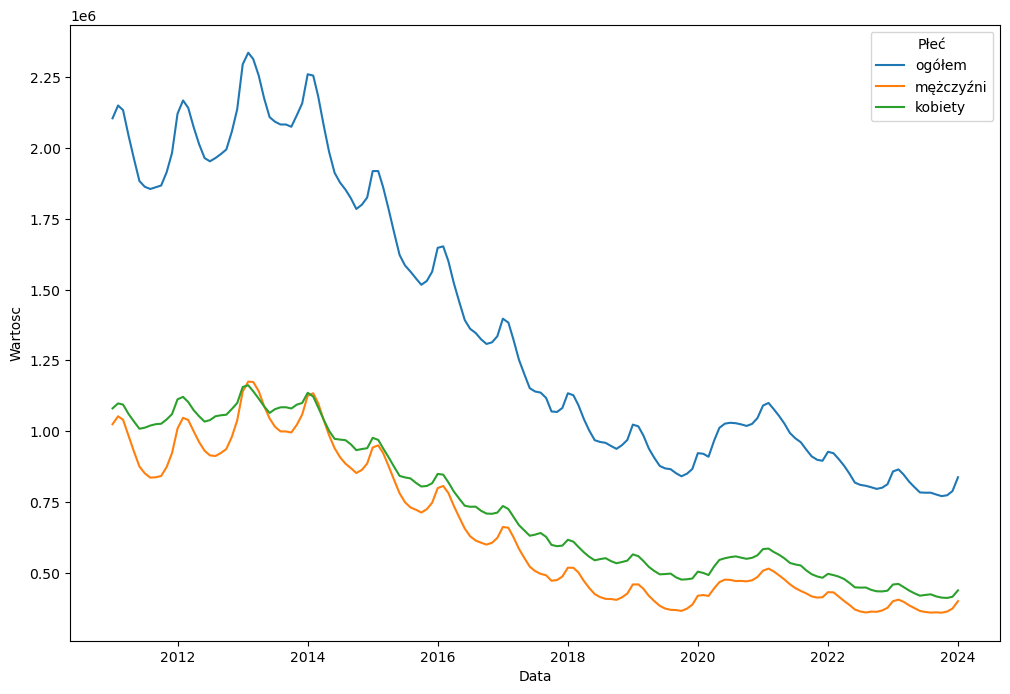

In [15]:
fig = plt.figure(figsize = [12,8])

sns.lineplot(x="Data", y="Wartosc",
             hue="Płeć",
             data=gender)

# ax.axhline(y=np.mean(gender[gender["Płeć"] == 'kobiety']['Wartosc']), color='green', linestyle='--', label='Linia dodatkowa')

In [16]:
gender.isin([np.inf, -np.inf]).any()

Płeć       False
Wartosc    False
Data       False
dtype: bool

In [17]:
gender['Wartosc'] = gender.Wartosc.astype(int)

<Axes: xlabel='Płeć', ylabel='Wartosc'>

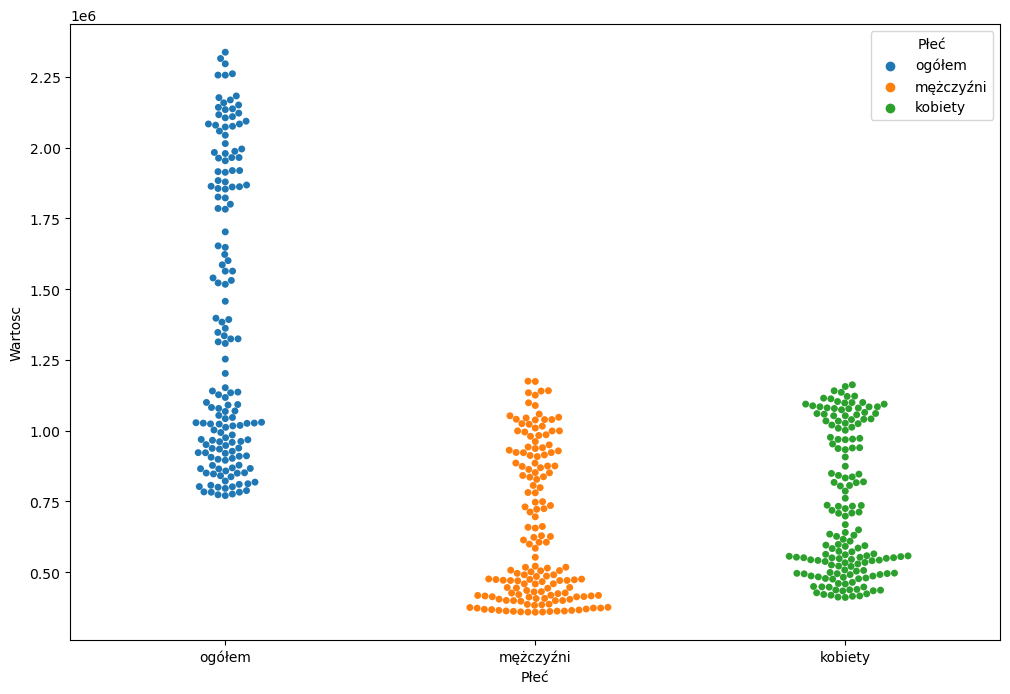

In [19]:
fig = plt.figure(figsize = [12,8])

sns.swarmplot(data=gender, x="Płeć", y="Wartosc", hue="Płeć")